# Deep Learning 2021
## Assignment 1 - Machine Learning Basics

### 1. Bias-Variance Tradeoff

You have a dataset of $1000$ instances that is divided into a Train-Dev-Test set $(60\%-20\%-20\%)$. The bayes error (or human performance) is $5\%$. 

1. If the training error is $1\%$ and the dev error is $10\%$, is it a bias or a variance problem?

2. If the training error is $10\%$ and the dev error is $10\%$, is it a bias or a variance problem?

3. If the training error is $10\%$ and the dev error is $6\%$, is it a bias or a variance problem?

4. If the training set and dev set are differently distributed, what can you expect? 

5. Is it acceptable to have different dev and test distributions? Why?

6. Is it acceptable for the training data to follow a different distribution compared to dev and test (dev and test set follow the same distribution)? Why?

#### Solution
1. Overfitting is a variance problem.
2. Underfitting is a bias problem.
3. Underfitting is a bias problem.
4. Then the prediction result on dev set will be wrong and not useful, which can not help to adjust the parameters or hyperparameters.
5. No, if they are not follow the same distribution, then we can't apply our model on test set, which will lead to a wrong result.
6. Yes, we can adjust the parameters by dev set.

### 2. Dev-Test Splits
If your dataset has $10^6$ instances and the bayes error is $5\%$,

1. are dev and test splits of $1\%$ acceptable, if the bayes error on both dev and test is $5\%$?
2. are dev and test splits of $1\%$ acceptable, if the bayes error on both dev and test splits is $15\%$?

#### Solution
1. yes, as long as the bayes error on every set are the same, dev and test split can be $1\%$.
2. no, the bayes error on dev and test set is to big, then the model need bigger dev and test set.

### 3. Sum of Squares Loss
Given a polynomial function of the form
\begin{equation} 
    f(x, {\bf{w}}) = \sum_{j=0}^M w_j x^j.
\end{equation}
We are given a training set comprising $N$ observations of $x$ (scalar values), given by $x_1, x_2, ..., x_n$, together with the corresponding observations of target values $y_1, y_2, ..., y_n$.

We would like to fit the data to the polynomial function, $f(x, {\bf{w}})$ by minimizing the following loss function:
\begin{equation} 
    E({\bf{w}}) = {1 \over 2}\sum_{n=1}^N (f(x_n, {\bf{w}}) - y_n)^2.
\end{equation}
Show that the coefficients ${\bf{w}} = \{w_i\}$ that minimize the above loss function are given by the solution to the following set of linear equations:
\begin{equation} 
    \sum_{j=0}^M A_{ij} w_j = Y_i
\end{equation}
where
\begin{equation} 
    A_{ij} = \sum_{n=1}^N (x_n)^{i+j} \text{ and } Y_i =\sum_{n=1}^N (x_n)^i y_n.
\end{equation}

#### Solution


### C0. Getting started with PyTorch: Tensors
Before working on the code assignments in this notebook, we recommend reading through the `Tensors.ipynb` tutorial notebook (Download from StudIP). If you are not familiar with PyTorch's Tensors yet, try creating some toy tensors and applying different operations on them. You can find lots of operations [here](https://pytorch.org/docs/stable/tensors.html). For this exercise, the following operations could be particularly useful to know:
- creating tensors
- joining two tensors (e.g. concatenating, stacking)
- transposing a tensor
- matrix (and vector) multiplication's
- summation, averaging, exponentiation

### C1. Linear Regression
Implement a linear regression (the `lin_reg` function) with __PyTorch__ to fit a line, $h(x) = w_0 + w_1 x$,  to a set of points generated using the `generate_data` function as defined below. In particular, find $w_0$ and $w_1$ such that the sum of squares error, $\sum_i ||h(x_i) - y_i||^2$, is minimized.

For this task, use tensor operations, `torch.*` and `torch.linalg.inv` to compute the solution via matrix inversion.

Afterward, compute and the **Empirical Loss (Training Error)** 
\begin{equation}
\mathcal{L} = \frac{1}{n}\sum_{i=1}^{n} l(f, x_i, y_i)
\end{equation}
where $l(f, x_i, y_i) = (y_i - f(x_i))^2$, i.e. squared loss.

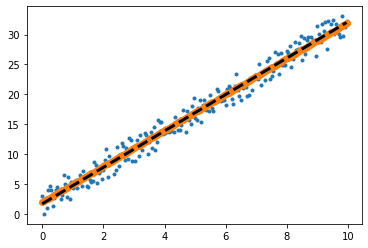

computed w:	[1.7239359617233276, 3.04364275932312]
actual w:	[2.0, 3.0]
squared loss = 1.9050


In [18]:
import torch
from matplotlib import pyplot as plt


def generate_data(f, spread, x_start, x_end, delta=1):
    """Generate a number of data points from f with some spread."""
    x = torch.arange(x_start, x_end, delta)
    y = f(x) + (torch.rand(*x.shape) - 0.5) * spread
    return x.unsqueeze(-1), y


def lin_reg(X, y):
    """
    Return the exact linear regression line, i.e. the weights which minimize the loss.

    Input values:
        - tensor X = [[x_0], ..., [x_n]], shape=(n, 1): the x-values of the data points
        - tensor y = [y_0, ..., y_n], shape=(n,): the y-values of the data points

    Return:
        - tensor w = [w_0, w_1] such that w_0 is the bias and w_1 is the slope. Recall h(x) = w_0 + w_1 * x.
    """
    # ToDo: Remove dummy and implement this function
    
    w = torch.rand(1, 2)[0]
    h = torch.zeros(size=X.shape)
    for i in range(1000):
        error_sum = 0
        for_gra_w0 = 0
        for_gra_w1 = 0
        for j in range(X.shape[0]):
            h[j] = w[0] + w[1] * X[j]
            error_sum = error_sum + (h[j] - y[j])**2
            for_gra_w0 = for_gra_w0 + 2*(h[j] - y[j])
            for_gra_w1 = for_gra_w1 + 2*(h[j] - y[j])*X[j]

        error = error_sum
        w[0] = w[0] - 0.0001 * for_gra_w0
        w[1] = w[1] - 0.0001 * for_gra_w1
    
    #w = torch.tensor([5, 2.0])
    return w


# generate some points
w_gt = torch.tensor([2, 3], dtype=torch.float)
f = lambda x: w_gt[0] + w_gt[1] * x
x, y = generate_data(f, spread=5, x_start=0, x_end=10, delta=0.05)

# plot the points
plt.plot(x, y, marker='.', linewidth=0)

# plot f (orange)
plt.plot(x, f(x), 'o', linewidth=5)

# perform linear regression
w = lin_reg(x, y)

# plot the regression line (black dashed)
plt.plot(x, w[0] + w[1] * x, 'k--', linewidth=3)

plt.show()

print(f'computed w:\t{w.tolist()}')
print(f'actual w:\t{w_gt.tolist()}')

# ToDo: Remove dummy and compute the square loss
squared_loss = 0
for i in range(x.shape[0]):
    squared_loss = squared_loss + (w[0] + w[1]*x[i] - y[i])**2
print('squared loss = %s' % format(float(squared_loss)/float(x.shape[0]), '.4f'))